In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [32]:
df = pd.read_csv("../../datasets/emip-enhanced/data/92_rawdata.tsv", sep="\t", comment="#")


In [36]:
trial_1 = df[df["trial_number"] == 1]
print(len(trial_1)/250)
duration = -(trial_1.iloc[0,1] - trial_1.iloc[-1, 1])
seconds = duration/1000/1000
seconds
#hours = seconds/3600
#hours

57.192


76.245786

In [29]:
calibration_df = df[df["status"] == "CALIBRATION"]
calibration_avg = calibration_df["L Mapped Diameter [mm]"].mean()
print(calibration_avg)
df = df[df["status"] == "READING"]
df = df[["L Mapped Diameter [mm]"]]
df = df.replace({0: np.nan})
df = df.dropna()
df

KeyError: 'status'

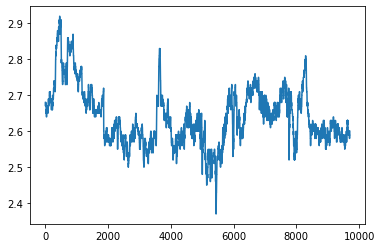

In [104]:
plt.plot(df["L Mapped Diameter [mm]"].values)
plt.show()

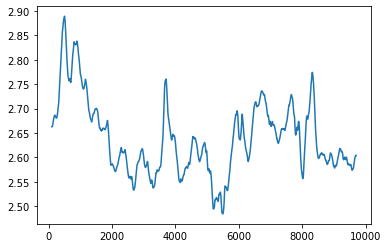

In [105]:
df['rolling'] = df['L Mapped Diameter [mm]'].rolling(100).mean()
plt.plot(df["rolling"].values)

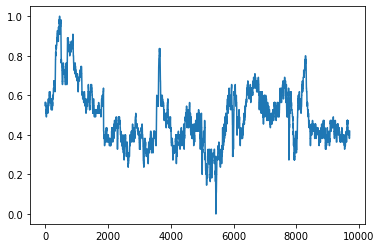

In [106]:
normalized_df = (df-df.min())/(df.max()-df.min())
plt.plot(normalized_df["L Mapped Diameter [mm]"].values)

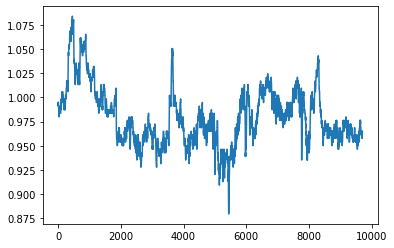

In [107]:
normalized_df = df/calibration_avg
plt.plot(normalized_df["L Mapped Diameter [mm]"].values)

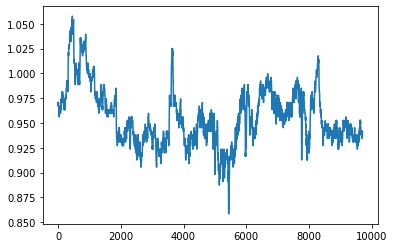

In [108]:
avg_first_30 = df.iloc[0:750, 0].mean()
normalized_df = df/avg_first_30
plt.plot(normalized_df["L Mapped Diameter [mm]"].values)

In [83]:
avg_first_30

4629    2.88
4630    2.88
4631    2.88
4632    2.88
4633    2.88
        ... 
5405    3.01
5406    3.00
5407    2.99
5408    2.98
5409    2.98
Name: L Mapped Diameter [mm], Length: 750, dtype: float64